### Regularization in ML

***Why Regularization?***

Sometimes our Machine learning model performs well on the training data but does not perform well on the unseen or test data. It means the model is not able to predict the output or target column for the unseen data by introducing noise in the output, and hence the model is called an overfitted model.

Noise implies those data points in the dataset which don’t really represent the true properties of your data, but only due to a random chance.

So, to deal with the problem of overfitting we take the help of regularization techniques.

***What is Regularization?***

👉 It is one of the most important concepts of machine learning. This technique prevents the model from overfitting by adding extra information to it.

👉 It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique forces us not to learn a more complex or flexible model, to avoid the problem of overfitting.

👉 “How flexibility of a model is represented?”
    For regression problems, the increase in flexibility of a model is represented by an increase in its coefficients, which are calculated from the regression line.

👉 In simple words, “In the Regularization technique, we reduce the magnitude of the independent variables by keeping the same  number of variables”. It maintains accuracy as well as a generalization of the model.

***How does Regularization Work?***

Regularization works by adding a penalty or complexity term or shrinkage term with Residual Sum of Squares (RSS) to the complex model.

Let’s consider the Simple linear regression equation:

Here Y represents the dependent feature or response which is the learned relation. Then, Y is approximated to β0 + β1X1 + β2X2 + …+ βpXp

Here, X1, X2, …Xp are the independent features or predictors for Y, and β0, β1,…..βn represents the coefficients estimates for different variables or predictors(X), which describes the weights or magnitude attached to the features, respectively.

In simple linear regression, our optimization function or loss function is known as the residual sum of squares (RSS).
We choose those set of coefficients, such that the following loss function is minimized:
![alt text](https://miro.medium.com/max/908/1*DY3-IaGcHjjLg7oYXx1O3A.png "RSS")

Now this will adjust the coefficient estimates based on the training data. If there is noise present in the training data, then the estimated coefficients won’t generalize well and are not able to predict the future data.

This is where regularization comes into the picture, which shrinks or regularizes these learned estimates towards zero, by adding a loss function with optimizing parameters to make a model that can predict the accurate value of Y.

**Types of Regularization**

Mainly, there are two types of regularization techniques:
1. Ridge Regression
2. Lasso Regression

**`Ridge Regression`**

👉 Ridge regression is a kind of linear regression in which we introduce a small amount of bias, known as Ridge regression penalty so that we can get better long-term predictions.

👉 In Statistics, it is known as the L-2 norm.

👉 In this technique, the cost function is altered by adding the penalty term (shrinkage term), which multiplies the lambda with the squared weight of each individual feature. Therefore, the optimization function(cost function) becomes:
![alt text](https://miro.medium.com/max/1106/1*CiqZ8lhwxi5c4d1nV24w4g.png "L2")

In the above equation, the penalty term regularizes the coefficients of the model, and hence ridge regression reduces the magnitudes of the coefficients that help to decrease the complexity of the model.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
advertising.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
X = advertising.drop(['sales'], axis=1)
y = advertising['sales']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [6]:
# Instantiating model object
from sklearn.linear_model import Ridge
ridge_reg = Ridge()

In [7]:
# Fitting model
ridge_reg.fit(X_train,y_train)

Ridge()

In [8]:
ridge_reg.coef_

array([0.04542554, 0.18975068, 0.00460492])

In [9]:
ridge_reg.intercept_

2.6529008693400407

In [10]:
# Prediction on unseen data
ridge_pred = ridge_reg.predict(X_test)

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
# MAE
ridge_mae = mean_absolute_error(y_test,ridge_pred)
ridge_mae

1.063862757217829

In [13]:
# MSE
ridge_mse = mean_squared_error(y_test,ridge_pred)
ridge_mse

1.8506784497241318

In [14]:
# RMSE
ridge_rmse = mean_squared_error(y_test,ridge_pred,squared=False)
ridge_rmse

1.3603964310906331

In [15]:
# Exploring the alpha parameter --> lambda
ridge_reg.alpha

1.0

alpha = 1.0 is the default value.

Let's play around with different alpha values to identify which gives optimum performance.

In [16]:
from sklearn.model_selection import cross_val_score
alpha_space = [0.001,0.1,1,5,10]
ridge_scores = []
for alpha in alpha_space:
    val = np.mean(cross_val_score(Ridge(alpha=alpha), X_train, y_train, cv = 5))
    ridge_scores.append(val)

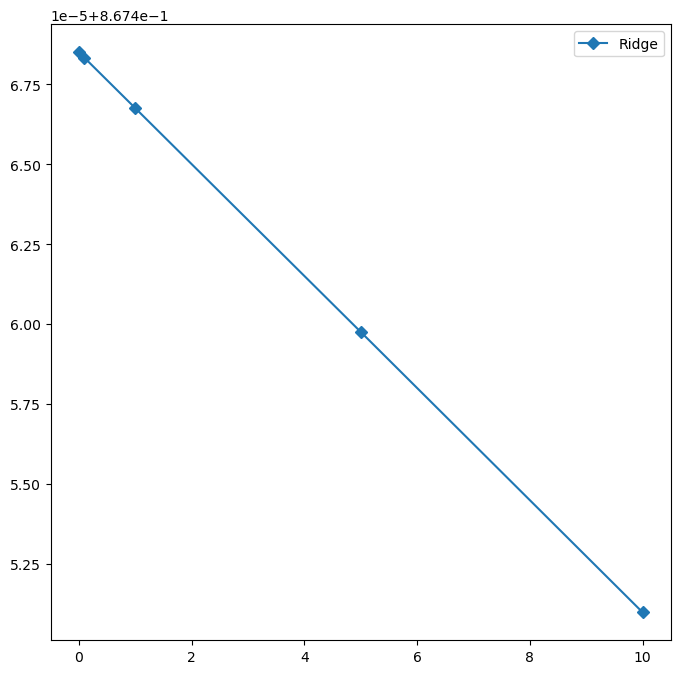

In [17]:
plt.figure(figsize=(8, 8))
plt.plot(alpha_space, ridge_scores, marker = 'D', label = "Ridge")
plt.legend()
plt.show()

**`Lasso Regression`**

👉 Lasso regression is another variant of the regularization technique used to reduce the complexity of the model. It stands for Least Absolute and Selection Operator.

👉 It is similar to the Ridge Regression except that the penalty term includes the absolute weights instead of a square of weights. Therefore, the optimization function becomes:
![alt text](https://miro.medium.com/max/1094/1*tHJ4sSPYV0bDr8xxEdiwXA.png "L1")

👉 In statistics, it is known as the L-1 norm.

👉 In this technique, the L1 penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero which means there is a complete removal of some of the features for model evaluation when the tuning parameter λ is sufficiently large. Therefore, the lasso method also performs feature selection and is said to yield sparse models.

In [18]:
# Instantiating model object
from sklearn.linear_model import Lasso
lasso_reg = Lasso()

In [19]:
# Fitting the train data
lasso_reg.fit(X_train,y_train)

Lasso()

In [20]:
lasso_reg.coef_

array([0.04535196, 0.18592151, 0.00369455])

In [21]:
lasso_reg.intercept_

2.7801811913292696

In [22]:
# Prediction on unseen data
lasso_pred = lasso_reg.predict(X_test)

In [23]:
# MAE
lasso_mae = mean_absolute_error(y_test,lasso_pred)
lasso_mae

1.0600877482525242

In [24]:
# MSE
lasso_mse = mean_squared_error(y_test,lasso_pred)
lasso_mse

1.8162710852457415

In [25]:
# RMSE
lasso_rmse = mean_squared_error(y_test,lasso_pred,squared=False)
lasso_rmse

1.3476910199469838

In [26]:
# Tweaking alpha values to determine optimum performing model
lasso_scores = []
for alpha in alpha_space:
    val = np.mean(cross_val_score(Lasso(alpha=alpha), X_train, y_train, cv = 10))
    lasso_scores.append(val)

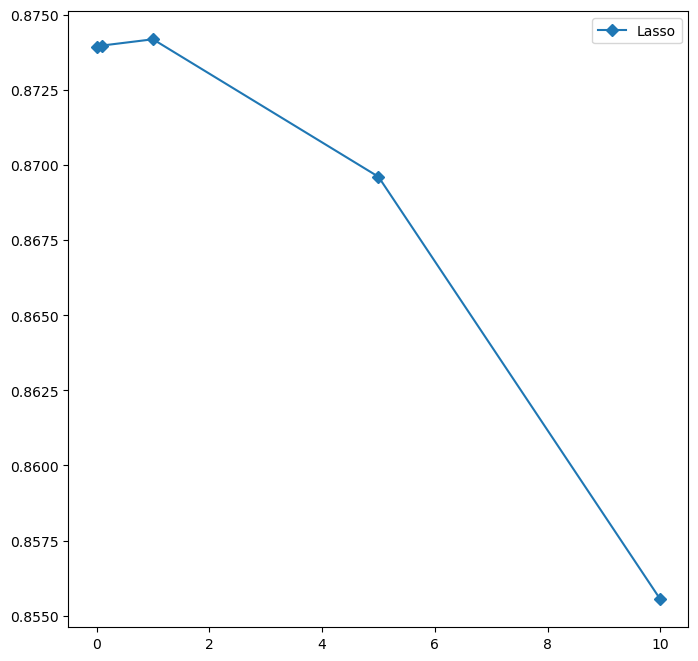

In [27]:
plt.figure(figsize=(8, 8))
plt.plot(alpha_space, lasso_scores, marker = 'D', label = "Lasso")
plt.legend()
plt.show()

**`Key Differences between Ridge and Lasso Regression`**

👉 Ridge regression helps us to reduce only the overfitting in the model while keeping all the features present in the model. It reduces the complexity of the model by shrinking the coefficients whereas Lasso regression helps in reducing the problem of overfitting in the model as well as automatic feature selection.

👉 Lasso Regression tends to make coefficients to absolute zero whereas Ridge regression never sets the value of coefficient to absolute zero.

#### Elastic Net Regression
- The elastic net algorithm uses a weighted combination of L1 and L2 regularization.
- A hyperparameter “alpha” is provided to assign how much weight is given to each of the L1 and L2 penalties. Alpha is a value between 0 and 1 and is used to weight the contribution of the L1 penalty and one minus the alpha value is used to weight the L2 penalty.
- elastic_net_penalty = (alpha * l1_penalty) + ((1 – alpha) * l2_penalty)

For example, an alpha of 0.5 would provide a 50 percent contribution of each penalty to the loss function. An alpha value of 0 gives all weight to the L2 penalty and a value of 1 gives all weight to the L1 penalty.

- The benefit is that elastic net allows a balance of both penalties, which can result in better performance than a model with either one or the other penalty on some problems.
- Another hyperparameter is provided called “lambda” that controls the weighting of the sum of both penalties to the loss function. A default value of 1.0 is used to use the fully weighted penalty; a value of 0 excludes the penalty. Very small values of lambada, such as 1e-3 or smaller, are common.
- elastic_net_loss = loss + (lambda * elastic_net_penalty)

In [28]:
from sklearn.linear_model import ElasticNet

In [29]:
# Instantiating model object
enet = ElasticNet()

In [30]:
# Fitting the train data
enet.fit(X_train,y_train)

ElasticNet()

In [31]:
enet.coef_

array([0.04538523, 0.18735377, 0.00427613])

In [32]:
enet.intercept_

2.724145647760796

In [33]:
# Prediction on unseen data
enet_pred = enet.predict(X_test)

In [34]:
# MAE
enet_mae = mean_absolute_error(y_test,enet_pred)
enet_mae

1.062965366805007

In [35]:
# MSE
enet_mse = mean_squared_error(y_test,enet_pred)
enet_mse

1.8326739674501091

In [36]:
# RMSE
enet_rmse = mean_squared_error(y_test,enet_pred,squared=False)
enet_rmse

1.3537628918869469

In [37]:
# Tuning l1 ratio parameter
l1_ratio = [0,0.01,0.1,1]
Elasticnet_scores = []
for l1 in l1_ratio:
    val = np.mean(cross_val_score(ElasticNet(l1_ratio=l1), X_train, y_train, cv = 10))
    Elasticnet_scores.append(val)

In [38]:
l1_ratio

[0, 0.01, 0.1, 1]

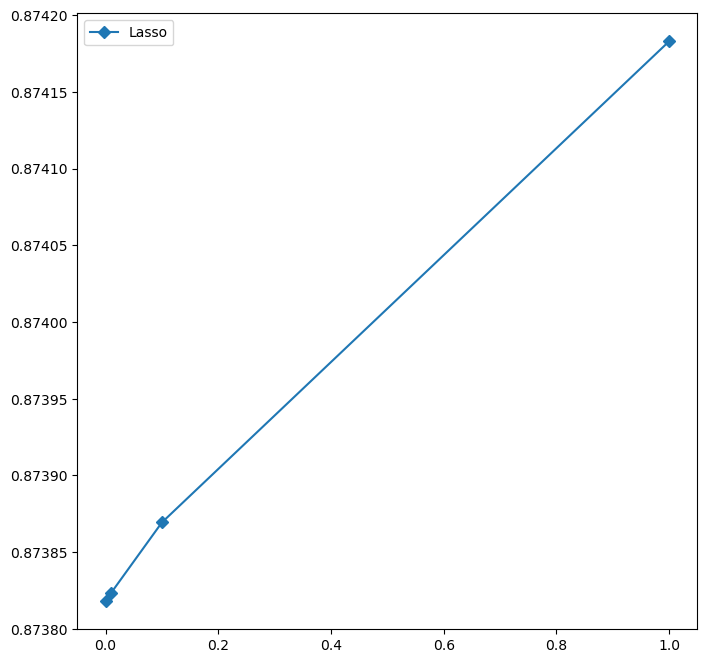

In [39]:
plt.figure(figsize=(8, 8))
plt.plot(l1_ratio, Elasticnet_scores, marker = 'D', label = "Lasso")
plt.legend()
plt.show()

### end of the notebook.